# Housing Price Prediction - Advanced Regression Assignment 

The notebook contains the following contents:
1. Data understanding and EDA
2. Data cleaning
3. Data preparation
4. Model Building and evaluation
5. Inference and Recommendation

#### <font color= Purple>Problem Statement:</font>
`Context`:
Surprise Housing, a well-established US-based housing company, is strategically expanding its operations to the Australian real estate market. Leveraging data analytics, the company aims to identify properties with potential for profit by purchasing them below market value and selling them at a premium. To accomplish this, Surprise Housing has gathered a comprehensive dataset from house sales in Australia. The dataset, available in CSV format, contains valuable insights that will be crucial in predicting house prices and making informed investment decisions.

`Objective`:
The primary objective of this initiative is to build a robust regression model using regularization techniques. The model will serve two key purposes: identifying the significant variables influencing house prices and assessing how well these variables collectively describe the pricing dynamics. By understanding the relationships between various independent variables and house prices, Surprise Housing aims to optimize its investment strategy. This predictive model will empower the management to make informed decisions on property acquisitions.

`Data Overview`:
The dataset provided by Surprise Housing encompasses diverse information on house sales in Australia. Each record includes details on independent variables such as location, size, amenities, and condition, with the target variable being the sale price of the houses. Through the application of regularization techniques, specifically ridge and lasso regression, the model will not only identify the most significant variables but also determine the optimal values of the regularization parameter (lambda). This information will be vital for Surprise Housing in shaping its market entry strategy and ensuring a data-driven approach to property investment in the Australian real estate landscape.

## Data understanding 

Begining by importing libraries and loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# Hide warnings
import warnings
warnings.filterwarnings('ignore')


In [311]:
## Loading/reading the dataset
House = pd.read_csv("train.csv", na_values="NAN") 
#`na_values="NAN"` for any occurance of "NAN" in the CSV file to be treated as missing values (NaN) in the DataFrame.

In [177]:
House.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [178]:
# Looking at all the column names
House.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [259]:
# Checking dimensions
House.shape

(1460, 81)

In [180]:
## Duplicate Check
# Making a copy of the dataset
df_dup = House.copy()

# Dropping the duplicate rows if any
df_dup.drop_duplicates(subset=None, inplace=True)

In [181]:
# Checing the shape of the duplicate df
df_dup.shape

(1460, 81)

In [182]:
# Checking column details
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### <font color= purple>Observations:</font>
- The dataset consist of 1460 rows and 81 columns.
- The shape of the original and copy is the same, indicating that there are no duplicate rows

In [183]:
House.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Handling missing data

In [260]:
# Checking for null columns
House.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [261]:
# Checking for percentage nulls
round(100*(House.isnull().sum()/len(House.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [262]:
# Grouping together all the columns with null values in ascending order
House.columns[House.isnull().any()] 

Null = House.isnull().sum()/len(House)*100
Null = Null[Null>0]
Null.sort_values(inplace=True, ascending=False)
Null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [312]:
# Replacing NAN values with 'none'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "PoolQC", "MiscFeature", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "Fence"]
for i in null_with_meaning:
    House[i].fillna("none", inplace=True)

In [264]:
House['PoolQC'].value_counts()

PoolQC
none    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64

In [265]:
House['MiscFeature'].value_counts()

MiscFeature
none    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [266]:
House['Alley'].value_counts()

Alley
none    1369
Grvl      50
Pave      41
Name: count, dtype: int64

In [267]:
House['Fence'].value_counts()

Fence
none     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [268]:
House['MasVnrType'].value_counts()

MasVnrType
none       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

### Will drop the variables "PoolQC", "Alley", "Fence" and "MiscFeatures" as they consist of very less unique values. Mostly none. 

In [313]:
House.drop("PoolQC", axis=1, inplace=True)
House.drop("MiscFeature", axis=1, inplace=True)
House.drop("Alley", axis=1, inplace=True)
House.drop("Fence", axis=1, inplace=True)

### <font color= purple>Observations:</font>
- There are null values in quite a few of the columns
- NaN in these column may have some meaning
- Upon reviewing the supplied data description file, it becomes apparent that NaN holds significance in certain categories. In instances where a value is NaN, it indicates the absence of a specific attribute in the house, thereby influencing its price. Consequently, instead of discarding these entries, it is advisable to fill the null cells with a designated value, namely "None," creating a distinct category that accounts for the absence of the attribute.

In [270]:
# Checking for null values again
House.columns[House.isnull().any()] 

Null = House.isnull().sum()/len(House)*100
Null = Null[Null>0]
Null.sort_values(inplace=True, ascending=False)
Null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### Imputing missing data
These NaN values are authentic instances that require specific handling as they were not accurately recorded.

In [271]:
#Checking for missing data
Total = House.isnull().sum().sort_values(ascending=False)
percent = (House.isnull().sum()/House.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
MasVnrArea        8  0.005479
Electrical        1  0.000685
BedroomAbvGr      0  0.000000
FireplaceQu       0  0.000000

In [314]:
# Dropping 'LotFrontage' because it have too many misiing values 
House.drop("LotFrontage", axis=1, inplace=True)

In [273]:
# Checking for missing data again
Total = House.isnull().sum().sort_values(ascending=False)
percent = (House.isnull().sum()/House.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479
Electrical       1  0.000685
SaleType         0  0.000000
HalfBath         0  0.000000
Functional       0  0.000000

In [315]:
# Imputing these two variables using median
House["GarageYrBlt"].fillna(House["GarageYrBlt"].median(), inplace=True)
House["MasVnrArea"].fillna(House["MasVnrArea"].median(), inplace=True)
# Imputing this varibale by replacing missing values with 'None'
House["MasVnrType"].fillna("None", inplace=True)

In [316]:
# Checking for missing values again
Total = House.isnull().sum().sort_values(ascending=False)
percent = (House.isnull().sum()/House.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
Electrical       1  0.000685
Id               0  0.000000
HalfBath         0  0.000000
FireplaceQu      0  0.000000
Fireplaces       0  0.000000
Functional       0  0.000000

In [276]:
House['Electrical'].value_counts

<bound method IndexOpsMixin.value_counts of 0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
1455    SBrkr
1456    SBrkr
1457    SBrkr
1458    FuseA
1459    SBrkr
Name: Electrical, Length: 1460, dtype: object>

In [317]:
# Imputing the variable 'Electrical' with mode 
House["Electrical"].fillna(House["Electrical"].mode()[0], inplace=True)

In [279]:
House['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [318]:
# Missing values check
Total = House.isnull().sum().sort_values(ascending=False)
percent = (House.isnull().sum()/House.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
Id               0      0.0
HalfBath         0      0.0
FireplaceQu      0      0.0
Fireplaces       0      0.0
Functional       0      0.0

### Missing values have been handled.

In [281]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [319]:
House.shape

(1460, 76)

## Exploratory Data Analysis(EDA) 

### EDA for categorical columns

In [320]:
# identifying and extracting the column names of categorical variables from the DataFrame 
cat_cols = House.select_dtypes(include=['object']).columns.tolist()

In [321]:
print(list(cat_cols))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


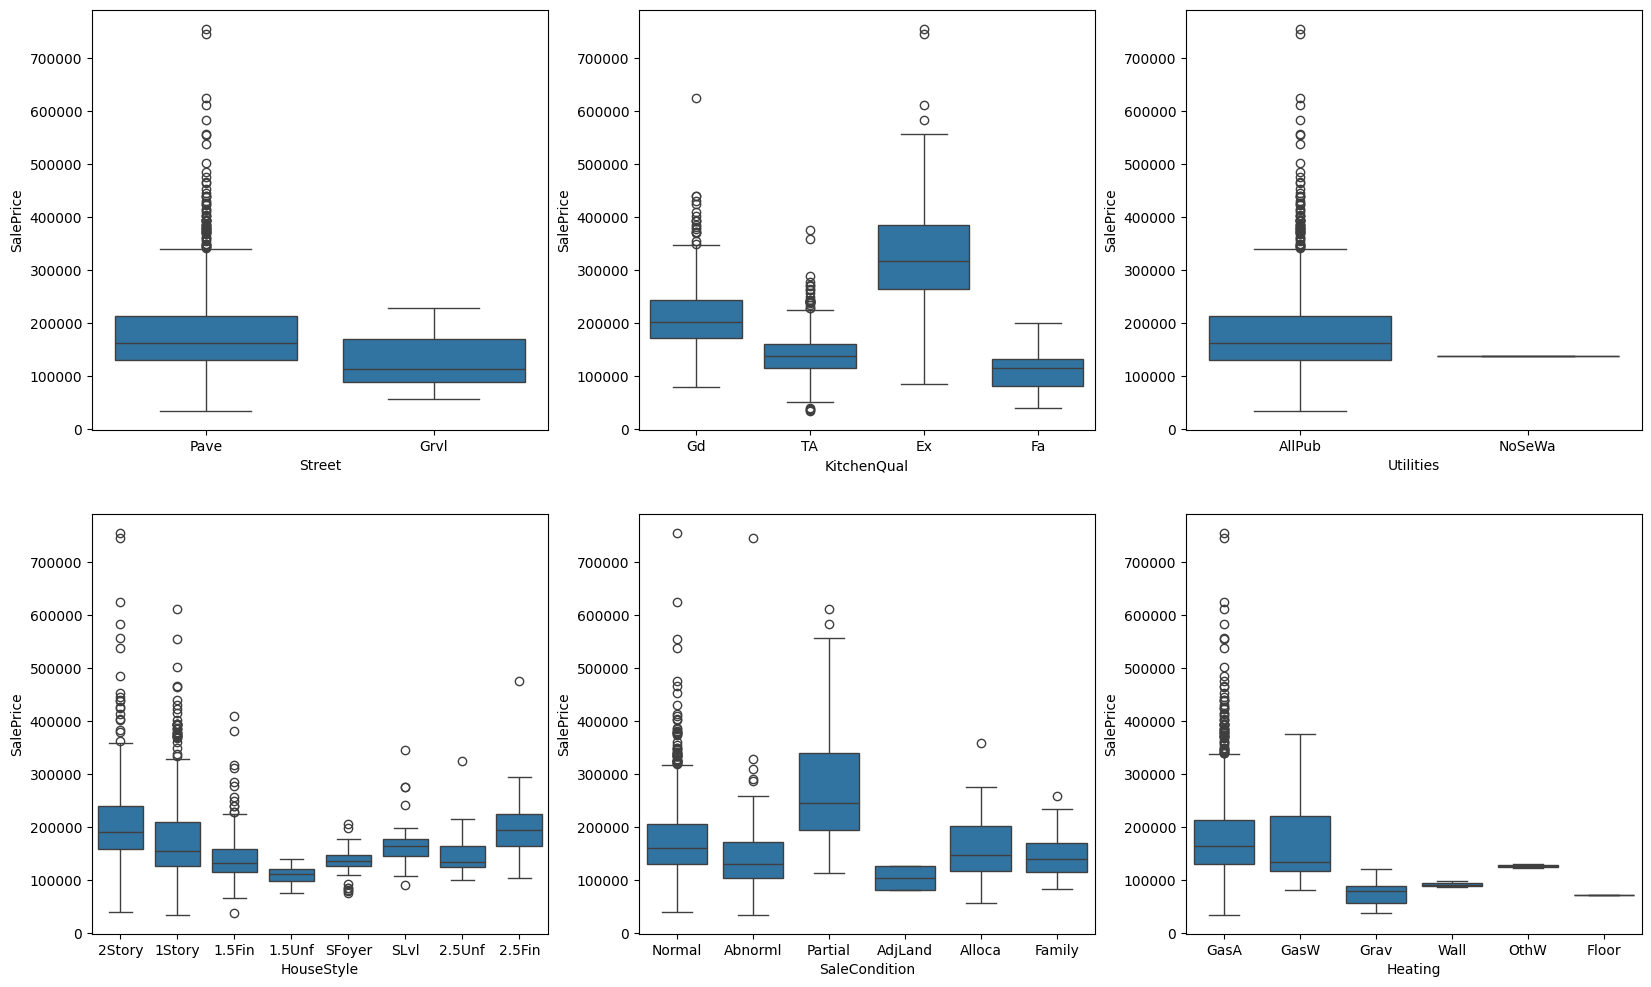

In [212]:
# Plotting boxplots for a few selected categorical variables against the target variable 'SalePrice'
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = House)
plt.subplot(2,3,2)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = House)
plt.subplot(2,3,3)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = House)
plt.subplot(2,3,4)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = House)
plt.subplot(2,3,5)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = House)
plt.subplot(2,3,6)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = House)
plt.show()

### <font color= purple>Observations:</font>
- Houses with `paved` streets are more expensive than those with `gravel` streets.
- `Ex`(Excellent) and go at a higher price than those with `FA`(Fair) Kitchen Quality.
- As expected, house with `AllPub` utilities i.e. electricity, gas, water and spetic tank are priced higher than `NOSeWA` i.e. only electricity, water and gas. 
- Housestyle with `2.5FIn` i.e. Two and one-half story: 2nd level finished has the highest sale price whereas `1.5Unf` i.e. One and one-half story: 2nd level unfinished has the lowest Sale price.
- Houses with `partial` (Home was not completed when last assessed -associated with New Homes) condition has the highest sale price whereas `AdjLand` (i.e. Adjoining Land Purchase) has the lowest.
- Type of heating: `GasA` (Gas forced warm air furnace) has the highest sale price while `Grav`(Gravity Furnace) and `Floor`(Floor Furnace) the lowest. 

In [41]:
# Borplots for some categorical variables
def plt_cat_column(column):
    # Create a figure with two subplots
    plt.figure(figsize=(20, 6))

    
    sns.barplot(x=column, y='SalePrice', data=House)
    plt.title(f'{column.capitalize()} Impact on Sale Price')
    plt.xlabel(f'{column.capitalize()}')
    plt.ylabel('Sale Price (SalePrice)')

 # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plots
    plt.show()

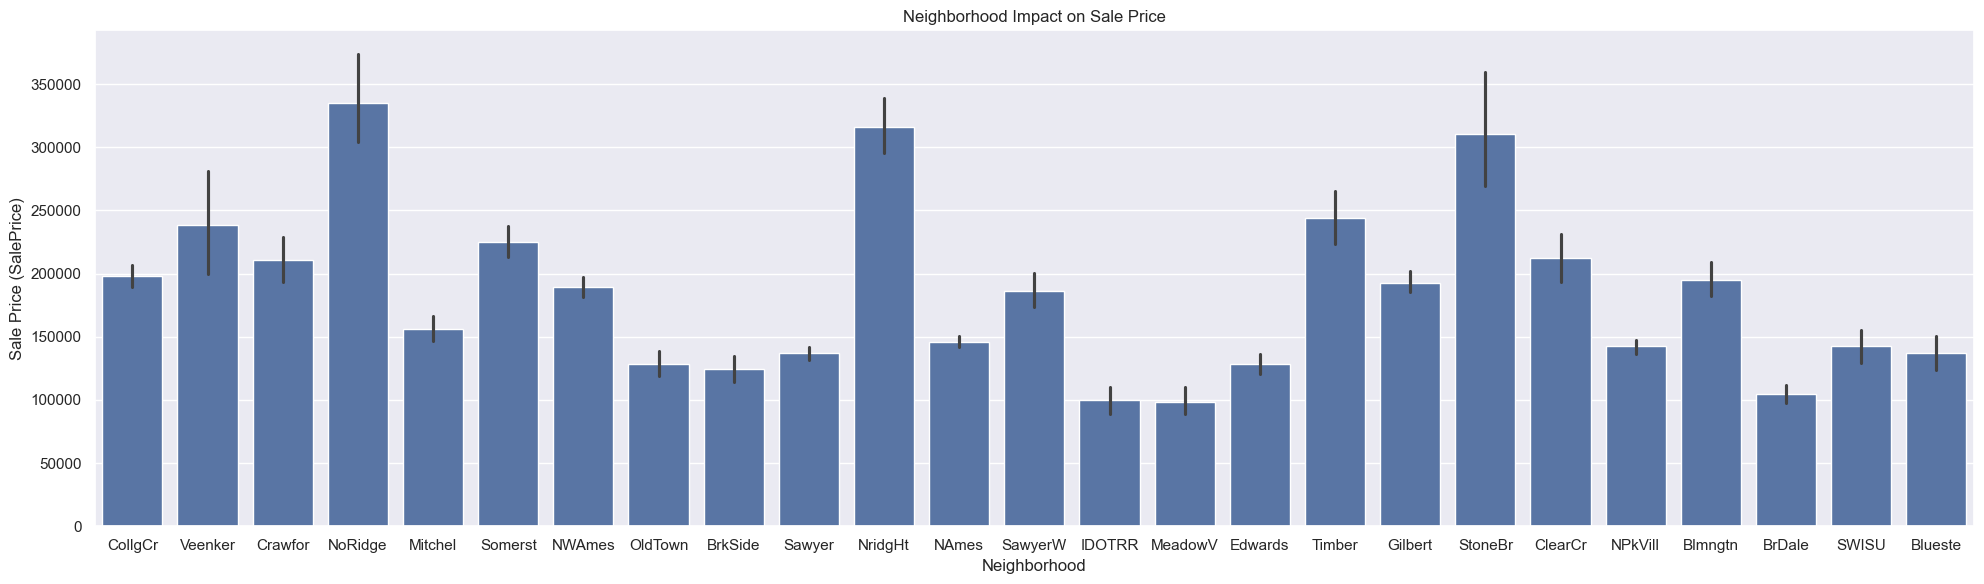

In [365]:
# Plotting bar graphs for 'Neighborhood'
plt_cat_column('Neighborhood')

### <font color= purple>Observations:</font>
- NoRidge(Northridge) has the highest SalePrice while MeadowV(Meadow Village) the lowest in terms of neighborhood. 

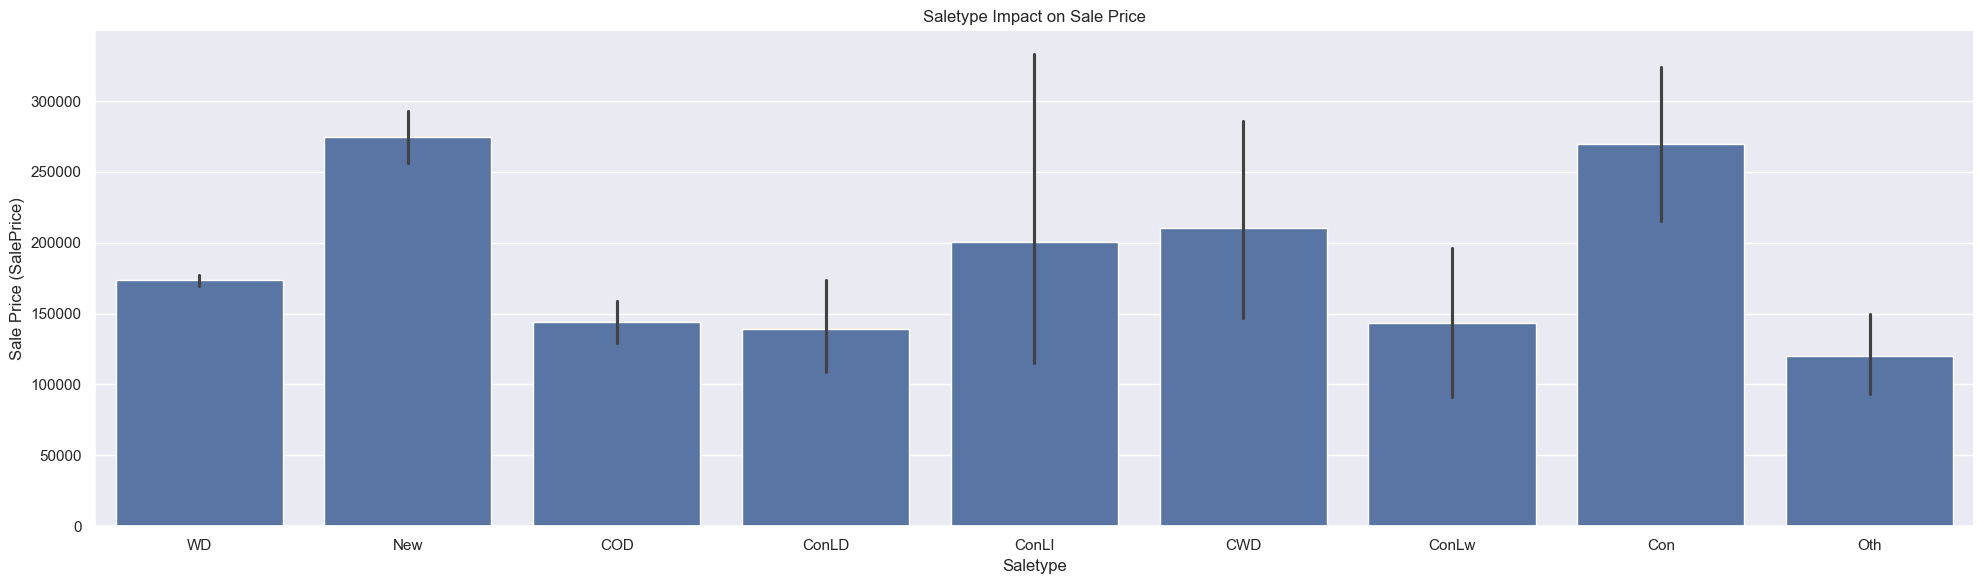

In [369]:
# Plotting bar graphs for 'SaleType'
plt_cat_column('SaleType')

### <font color= purple>Observations:</font>
- New (Home just constructed and sold) has the highest SalePrice while Oth(Other) the lowest in terms of Saletype. 

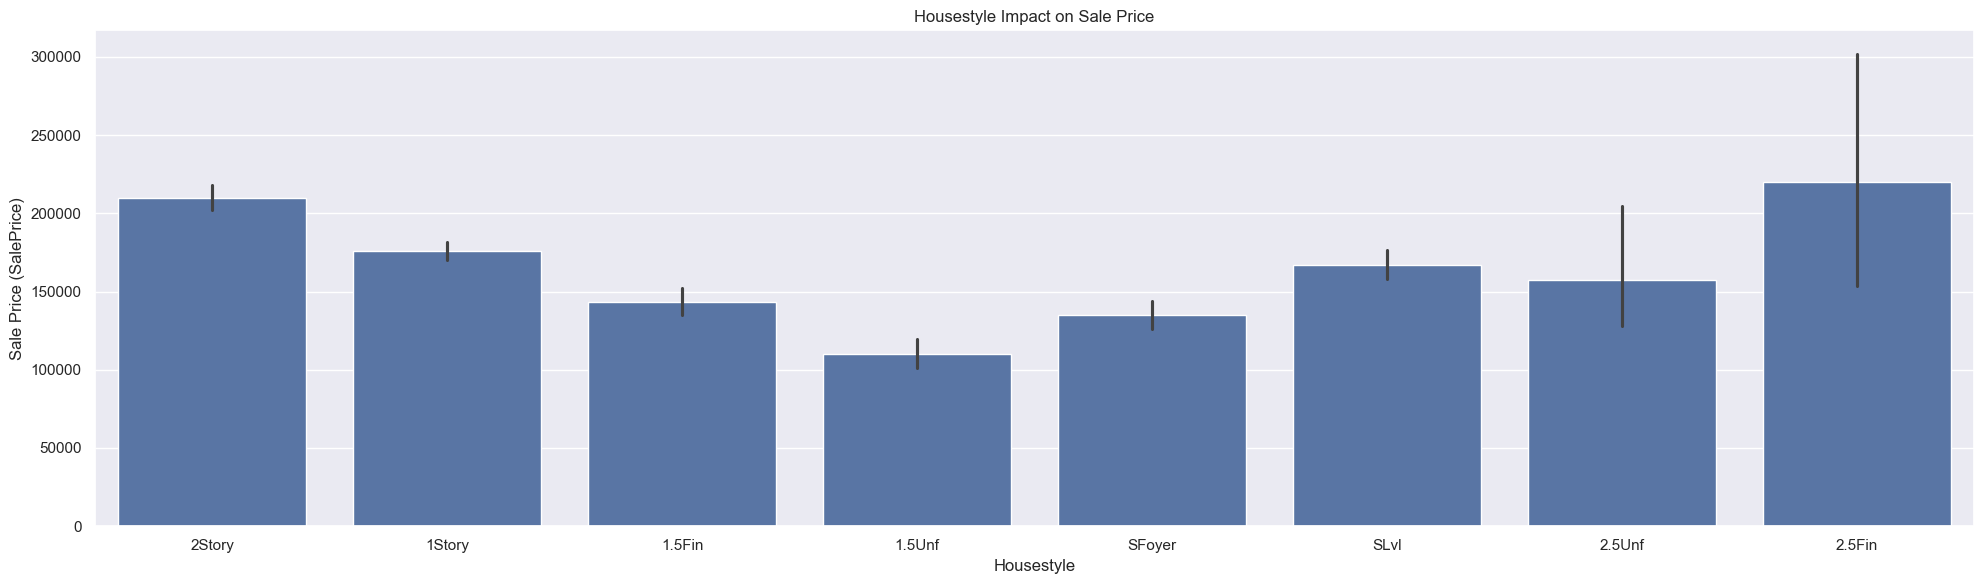

In [368]:
# Plotting bar graphs for 'HouseStyle'
plt_cat_column('HouseStyle')

### <font color= purple>Observations:</font>
- As observed in the boxplot above this bar graph conveys the same message i.e. Housestyle with `2.5FIn` i.e. Two and one-half story: 2nd level finished has the highest sale price whereas `1.5Unf` i.e. One and one-half story: 2nd level unfinished has the lowest Sale price.

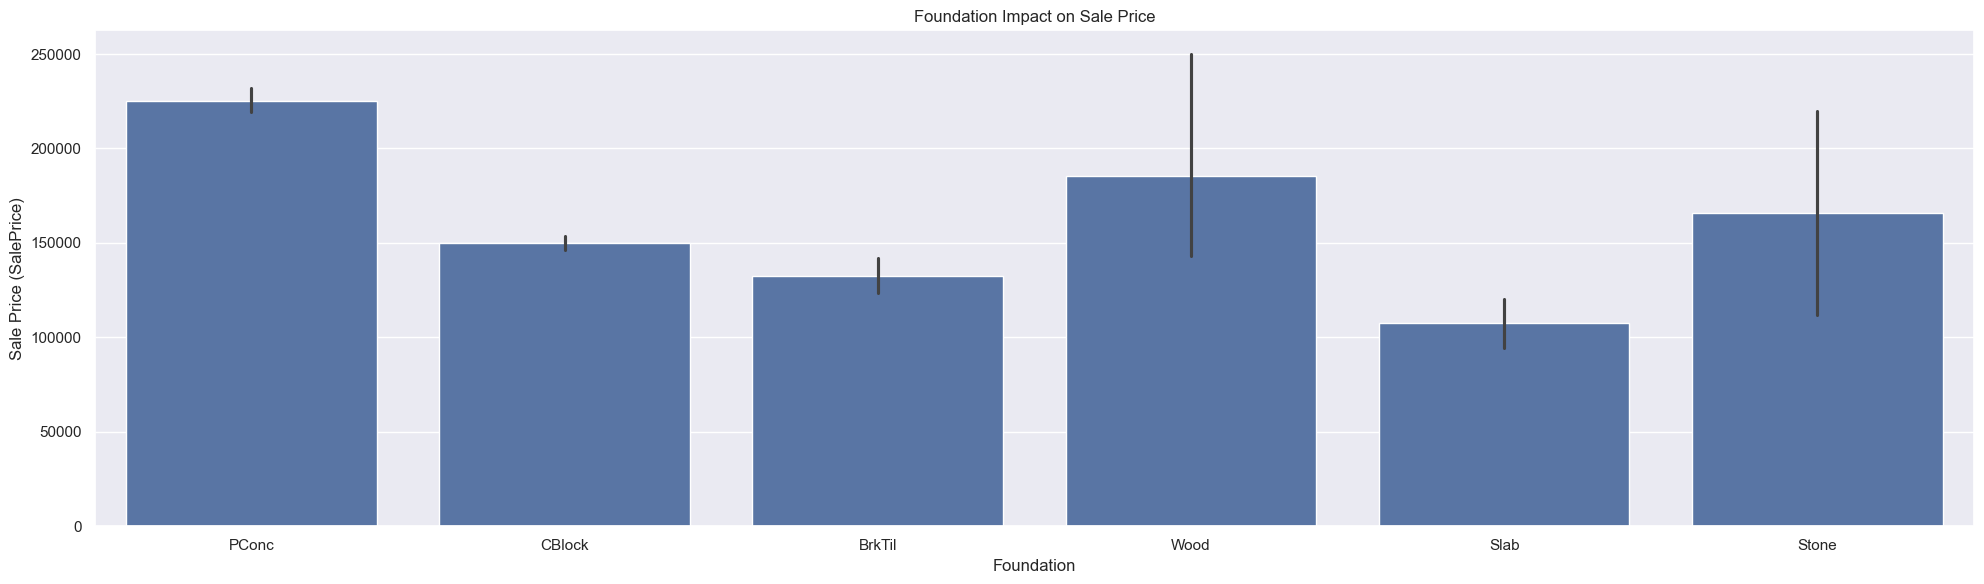

In [372]:
# Plotting bar graphs for 'Foundation'
plt_cat_column('Foundation')

### <font color= purple>Observations:</font>
- PConc(Poured Contrete) has the highest SalePrice while Slab the lowest in terms of the type of foundation the houses have. 

### Further EDA to weed out weak predictor variables

#### EDA for numerical variables

In [322]:
# Extracting numerical variables from the dataframe
num_df = House.select_dtypes(include=['float64', 'int64'])
num_df.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 37 columns]

In [323]:
# Dropping ID Column
num_df = num_df.drop(['Id'], axis=1)
num_df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0       196.0         706           0        150  ...           0   
1         0.0         978           0        284  ...         298   
2       162.0         486           0        434  ...           0   
3         0.0         216           0        540  ...           0   
4       350.0         655           0        490  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 36 columns]

In [287]:
num_df.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

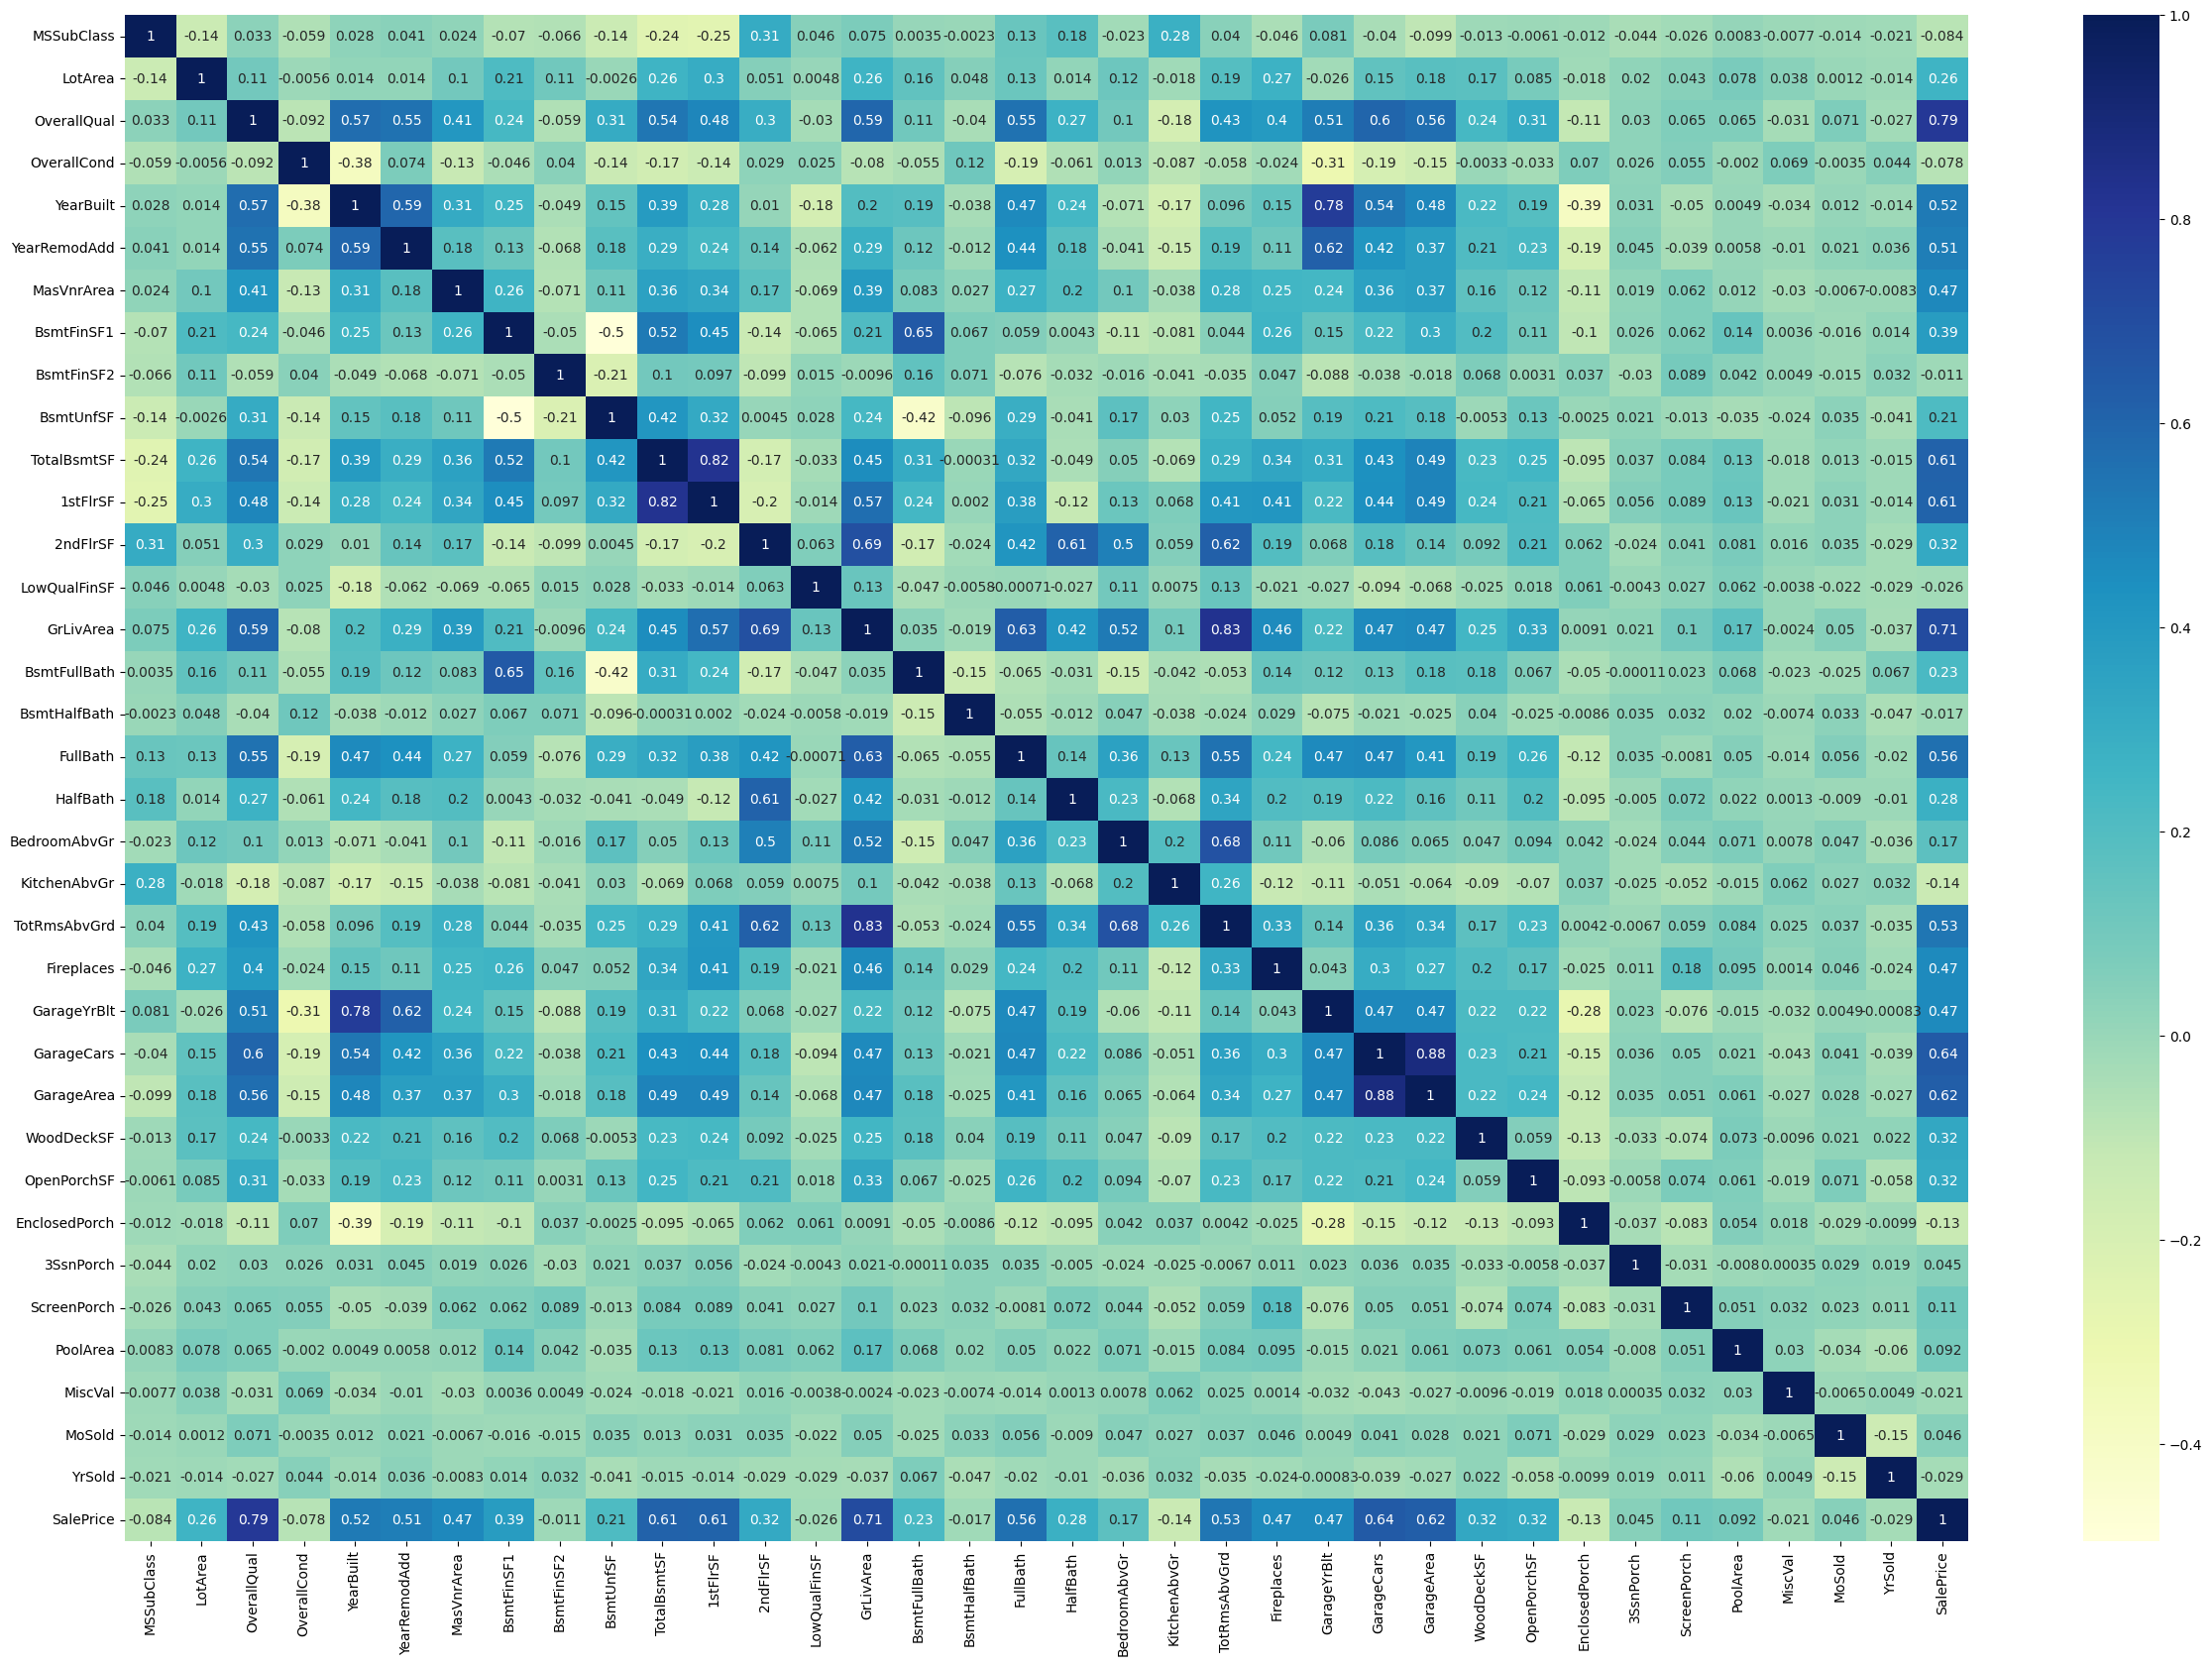

In [45]:
#correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(num_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

### <font color= purple>Observations:</font>
#### We observe correlations among certain variables. Rather than promptly discarding these columns, we will assess their predictive significance beforehand.

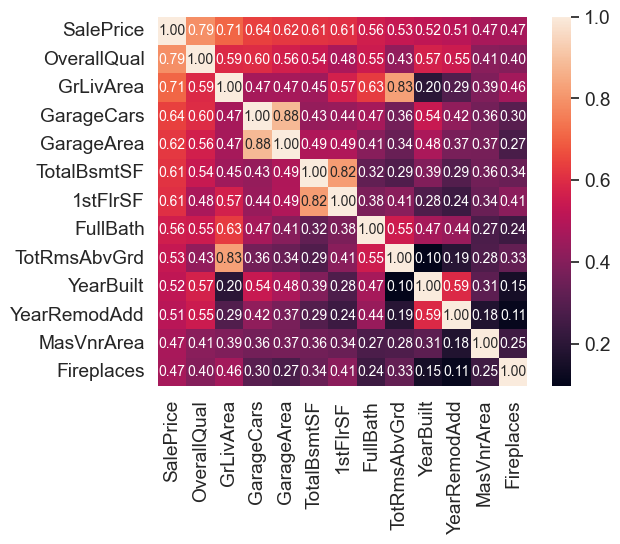

In [46]:
#SalePrice correlation matrix with top 13 most correlated variables
k = 13 #number of variables for heatmap
cols = num_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(House[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### We will now make pairplots for the above 13 variables to determine which variable to keep and which to remove 

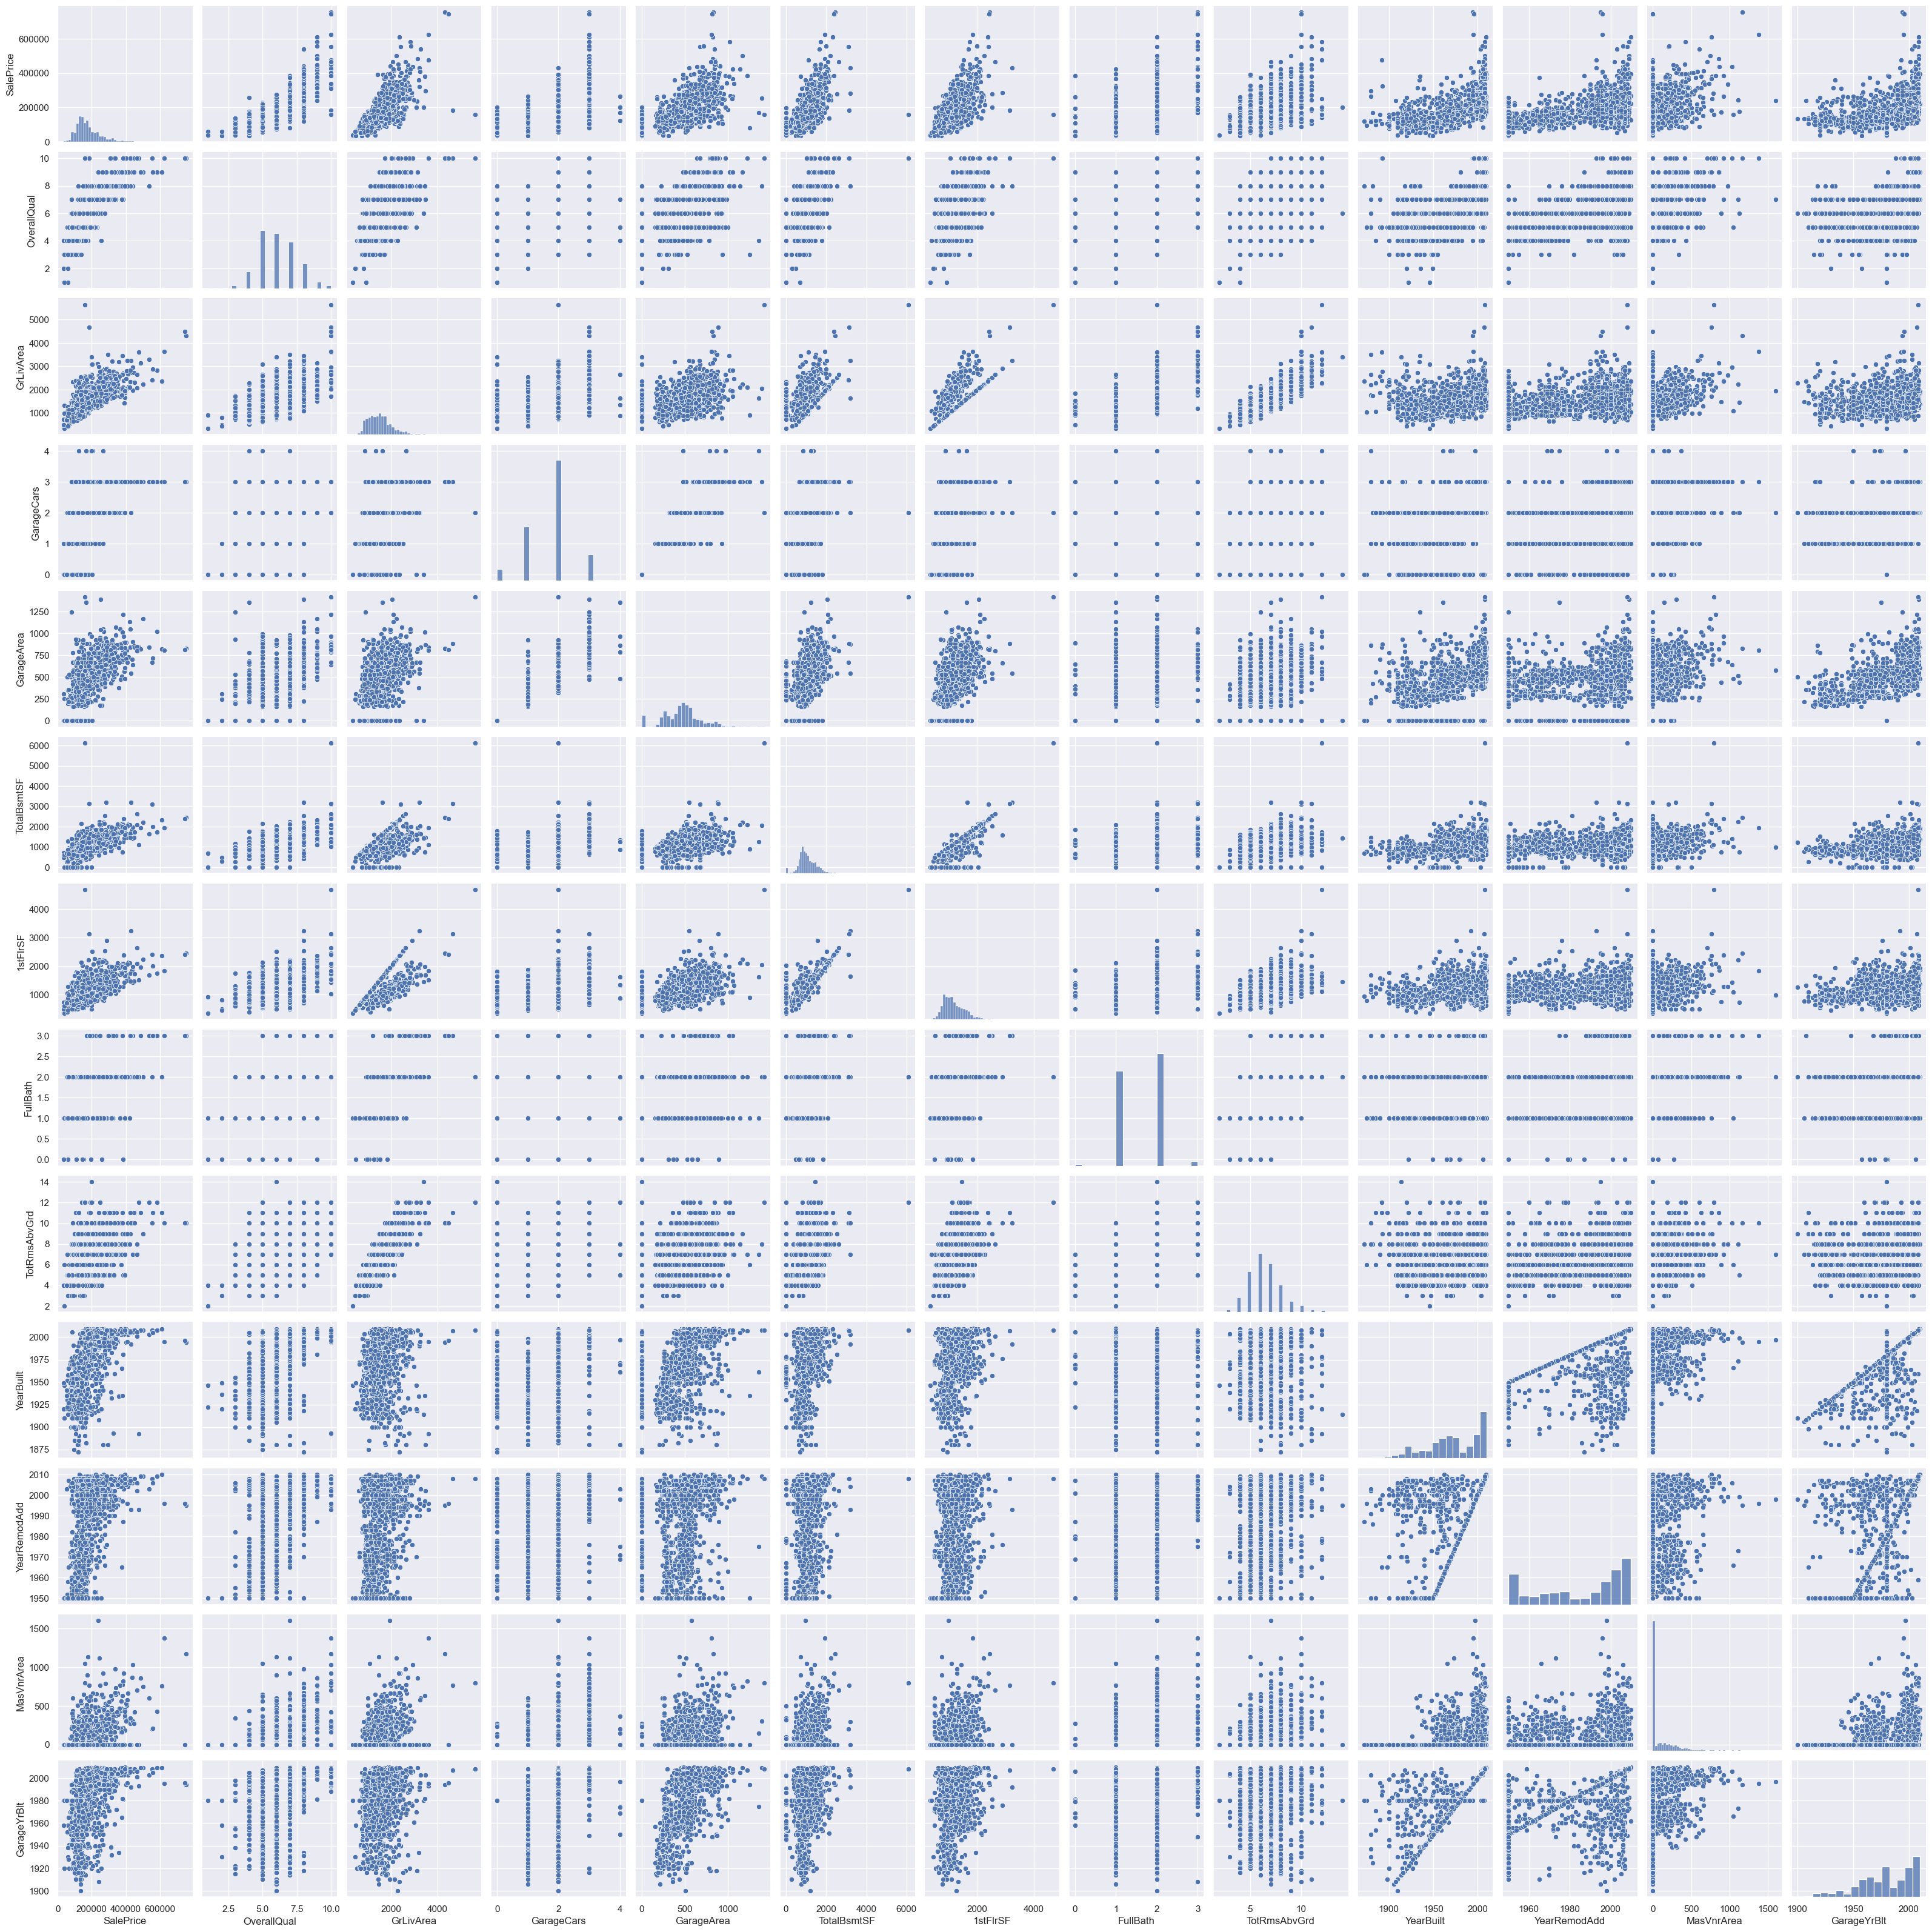

In [47]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt']
sns.pairplot(House[cols], size = 2.5)
plt.show()

### <font color= purple>Observations:</font>
- The variables 'GarageCars', 'FullBath', 'TotRmsAbvGrd' and 'GarageYrBlt' do not show strong patterns influncing the Sale Price and hence will be removed.

In [324]:
# Dropping some variables that do not contribute to sales
House = House.drop(['GarageCars'], axis = 1)
House = House.drop(['FullBath'], axis = 1)
House = House.drop(['TotRmsAbvGrd'], axis = 1)
House = House.drop(['GarageYrBlt'], axis = 1)    

House.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 72 columns]

In [325]:
# Removing time related variables 
House = House.drop(['MoSold'], axis = 1)
House = House.drop(['YrSold'], axis = 1)
House = House.drop(['YearBuilt'], axis = 1)
House = House.drop(['YearRemodAdd'], axis = 1)

In [326]:
# Cehcking the composition of data types in the dataset
pd.DataFrame(House.dtypes).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     39
int64      28
float64     1
Name: count, dtype: int64

In [327]:
House.shape

(1460, 68)

### Cehcking the distribution of SalesPrice 

<Axes: xlabel='SalePrice', ylabel='Density'>

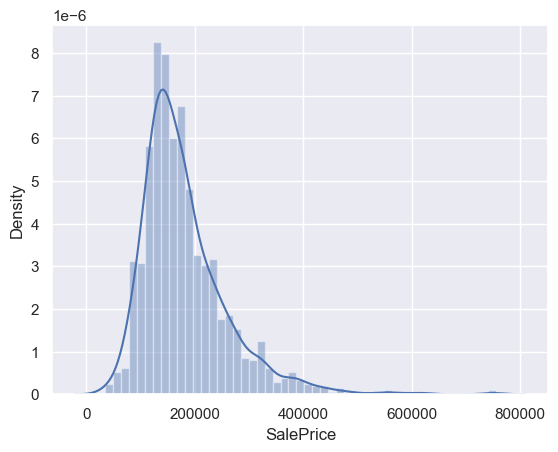

In [51]:
# Plotting a distribution plot for SalePrice
sns.distplot(House["SalePrice"])

### <font color= purple>Observations:</font>
- The distributio of SalePrice is skewed towrds the left.
- Need to transform the SalePrice variable, likely log tranformation to get a normal and centred distribution.

<Axes: xlabel='SalePrice', ylabel='Density'>

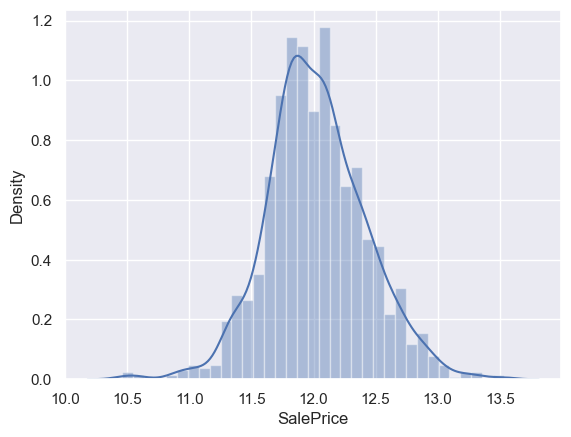

In [52]:
# Plotting a distplot for log transformed SalePrice
sns.distplot(np.log(House["SalePrice"]))

In [328]:
# Adding a Log transformed varibale to the dataframe/dataset
House["LogSalePrice"] = np.log(House["SalePrice"])

## Data Preparation

Having addressed all the missing values, we can now shift our focus to feature engineering, which constitutes the second phase of our data preprocessing. To prepare the data for training the model, we must generate feature vectors, involving the transformation of categorical values into numerical representations.

In [329]:

House_types = House.dtypes
#numerical values are either type int or float
train_num = House_types[(House_types == 'int64') | (House_types == float)] 
#categorical values are type object
train_cat = House_types[House_types == object] 

In [330]:
numerical_train = list(train_num.index)

In [331]:
print(numerical_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LogSalePrice']


In [271]:
cat_train = list(train_cat.index)

In [98]:
House[cat_train].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0        3      0     2        1           2         0         0         0   
1        3      0     2        1           2         0         2         0   
2        3      0     2        0           2         0         0         0   
3        3      0     2        0           2         0         1         0   
4        3      0     2        0           2         0         2         0   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0           14          3  ...          0            3          5          5   
1           12          7  ...          0            3          5          5   
2           14          3  ...          0            3          5          5   
3            7          3  ...          4            0          5          5   
4           15          3  ...          0            3          5          5   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          2      2     3           1        4             0  
1          2      2     3           1        4             0  
2          2      2     3           1        4             0  
3          2      2     3           1        4             3  
4          2      2     3           1        4             0  

[5 rows x 43 columns]

In [59]:
print(cat_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [273]:
for i in cat_train:
    feature_set = set(House[i])
    for j in feature_set:
        feature_list = list(feature_set)
        House.loc[House[i] == j, i] = feature_list.index(j)

In [186]:
House.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60        3     8450      0     2        1           2   
1   2          20        3     9600      0     2        1           2   
2   3          60        3    11250      0     2        0           2   
3   4          70        3     9550      0     2        0           2   
4   5          60        3    14260      0     2        0           2   

  Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         0         0  ...           0        0      2     3           1   
1         0         2  ...           0        0      2     3           1   
2         0         0  ...           0        0      2     3           1   
3         0         1  ...           0        0      2     3           1   
4         0         2  ...           0        0      2     3           1   

  MiscVal  SaleType  SaleCondition SalePrice LogSalePrice  
0       0         4              0    208500    12.247694  
1       0         4              0    181500    12.109011  
2       0         4              0    223500    12.317167  
3       0         4              3    140000    11.849398  
4       0         4              0    250000    12.429216  

[5 rows x 73 columns]

In [332]:
House.shape

(1460, 69)

In [333]:
# Drop ID
House = House.drop(['Id'], axis=1)

In [334]:
# convert into dummies - one hot encoding
House = pd.get_dummies(House, drop_first=True, dtype='int' )
House.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0           0        150          856       856  ...               0   
1           0        284         1262      1262  ...               0   
2           0        434          920       920  ...               0   
3           0        540          756       961  ...               0   
4           0        490         1145      1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 239 columns]

In [335]:
X = House.drop(["SalePrice", "LogSalePrice"], axis=1)
X.shape

(1460, 237)

In [336]:
y = House["LogSalePrice"]

In [337]:
X.describe()

MSSubClass        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342   103.117123   
std      42.300571    9981.264932     1.382997     1.112799   180.731373   
min      20.000000    1300.000000     1.000000     1.000000     0.000000   
25%      20.000000    7553.500000     5.000000     5.000000     0.000000   
50%      50.000000    9478.500000     6.000000     5.000000     0.000000   
75%      70.000000   11601.500000     7.000000     6.000000   164.250000   
max     190.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 237 columns]

In [338]:
# Getting the data types of the columns in dataframe house
Xtypes = X.dtypes

# Selecting columns with numeric data types (int64 or float)
numeric_typeX = Xtypes[(Xtypes == 'int64') | (Xtypes == float)] 

In [339]:
numerical_columnsX = list(numeric_typeX.index)
print(numerical_columnsX)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Ne

In [69]:
# Selecting columns with categorical data types (object)
categorical_type = Htypes[Htypes == object] 

NameError: name 'Htypes' is not defined

In [143]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

[]


In [340]:
pd.DataFrame(X.dtypes).reset_index().set_index(0).reset_index()[0].value_counts()

0
int64      236
float64      1
Name: count, dtype: int64

In [341]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [342]:
from sklearn.preprocessing import StandardScaler

In [343]:
scaler = StandardScaler()

In [344]:
X_train[numerical_columnsX] = scaler.fit_transform(X_train[numerical_columnsX])

In [278]:
#type of each feature in data: int, float, object
types = House.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [345]:
X_test[numerical_columnsX] = scaler.fit_transform(X_test[numerical_columnsX])

In [346]:
X_train.describe()

MSSubClass       LotArea   OverallQual   OverallCond    MasVnrArea  \
count  1021.000000  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean      0.000000  5.915390e-17  1.287467e-16  3.375252e-16 -6.263354e-17   
std       1.000490  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min      -0.888086 -8.742840e-01 -3.638884e+00 -4.197642e+00 -5.580245e-01   
25%      -0.888086 -2.950018e-01 -7.798608e-01 -5.330054e-01 -5.580245e-01   
50%      -0.195040 -9.566430e-02 -6.510508e-02 -5.330054e-01 -5.580245e-01   
75%       0.266992  9.959718e-02  6.496507e-01  3.831537e-01  2.857702e-01   
max       3.039179  1.987157e+01  2.793918e+00  3.131631e+00  7.986733e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   6.089372e-17 -1.565839e-17  1.235273e-16  3.479641e-17 -2.566235e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -9.635738e-01 -2.933126e-01 -1.257417e+00 -2.313626e+00 -2.001824e+00   
25%   -9.635738e-01 -2.933126e-01 -7.757532e-01 -5.856252e-01 -7.374138e-01   
50%   -1.200318e-01 -2.933126e-01 -2.271922e-01 -1.519906e-01 -2.070153e-01   
75%    5.685740e-01 -2.933126e-01  5.399012e-01  5.496695e-01  6.376005e-01   
max    1.118171e+01  8.338494e+00  3.951683e+00  1.100048e+01  8.857522e+00   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...    1.021000e+03    1.021000e+03  1.021000e+03  1.021000e+03   
mean   ...   -2.783713e-17   -1.043892e-17  8.351139e-17 -2.957695e-17   
std    ...    1.000490e+00    1.000490e+00  1.000490e+00  1.000490e+00   
min    ...   -5.428586e-02   -6.271472e-02 -2.915749e-01 -5.428586e-02   
25%    ...   -5.428586e-02   -6.271472e-02 -2.915749e-01 -5.428586e-02   
50%    ...   -5.428586e-02   -6.271472e-02 -2.915749e-01 -5.428586e-02   
75%    ...   -5.428586e-02   -6.271472e-02 -2.915749e-01 -5.428586e-02   
max    ...    1.842100e+01    1.594522e+01  3.429650e+00  1.842100e+01   

        SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1.021000e+03           1.021000e+03          1.021000e+03   
mean  -1.913803e-16          -4.871498e-17         -6.959282e-18   
std    1.000490e+00           1.000490e+00          1.000490e+00   
min   -2.595159e+00          -5.428586e-02         -8.886695e-02   
25%    3.853329e-01          -5.428586e-02         -8.886695e-02   
50%    3.853329e-01          -5.428586e-02         -8.886695e-02   
75%    3.853329e-01          -5.428586e-02         -8.886695e-02   
max    3.853329e-01           1.842100e+01          1.125278e+01   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count          1.021000e+03          1.021000e+03           1.021000e+03  
mean           4.175569e-17          7.655211e-17           8.351139e-17  
std            1.000490e+00          1.000490e+00           1.000490e+00  
min           -1.179096e-01         -2.176225e+00          -2.915749e-01  
25%           -1.179096e-01          4.595113e-01          -2.915749e-01  
50%           -1.179096e-01          4.595113e-01          -2.915749e-01  
75%           -1.179096e-01          4.595113e-01          -2.915749e-01  
max            8.481071e+00          4.595113e-01           3.429650e+00  

[8 rows x 237 columns]

# Model Building

Having completed the preprocessing and exploration of our data, we now possess a more comprehensive understanding of its nature. With this insight, we can start the construction and evaluation of various regression models to predict the Sale Price of each house.

In [347]:
# Creating an instance of the LinearRegression model
lm = LinearRegression()

# Training the model using the training data
lm.fit(X_train, y_train)

LinearRegression()

In [348]:
# Printing the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.022198354830072
[-1.89117488e-02  2.89655286e-02  5.98127141e-02  3.85855396e-02
  1.15892694e-03 -2.80094492e+10 -1.02925032e+10 -2.70293379e+10
  2.76601399e+10  8.00374318e+09  8.75363908e+09  9.69434786e+08
 -1.06985787e+10  1.08181122e-02  8.66265711e-04  7.05526263e-03
  1.18040648e-02 -1.61576262e-02 -3.90474447e-03  3.46450992e-02
  1.03763335e-02  3.77405189e-03  8.06776813e-04  5.44150021e-03
  7.17080343e-03  4.55225643e-03  1.93316886e-03  9.21707600e-02
  5.05714892e-02  1.77709052e-01  1.39058625e-01  3.02733858e-03
  3.88878068e-03  1.90711021e-03  2.29081511e-03  1.60408020e-03
 -5.62191010e-04  7.95090199e-03 -5.09929657e-03  6.61563873e-03
 -7.52019882e-03 -1.00100040e-03 -4.35924530e-03  5.30576706e-03
 -2.11200714e-02  9.79423523e-04 -6.94084167e-03  5.05352020e-03
  9.09757614e-03  4.69684601e-03  2.23569870e-02 -1.58100128e-02
  7.95364380e-03 -2.48479843e-03 -1.83219910e-02 -2.00510025e-03
 -3.51381302e-03 -9.14573669e-04 -2.21776962e-03  6.22129440e-03
  1.70

In [349]:
from sklearn.metrics import r2_score, mean_squared_error

In [350]:
# Getting the r2, rss and mse of the train and test datasets 
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9552570313736906
-7.964311326736596e+20
7.180899361967839
5.739765366297665e+22
0.007033202117500332
1.3104487137665902e+20


### <font color= purple>Observations:</font>
- The r-squared value for the train set is 0.955 but that of test set is -7.96 suggesting that overfitting has occured. 
- We need regularisation to circumvent this overfitting problem for which we will use Lasso and Ridge regression. 

### Lasso Regression

In [351]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 237)
y_train (1021,)


In [377]:
## Defining a dictionary of hyperparameters for the Lasso model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# Creating a Lasso model
lasso = Lasso()

# Setting the number of folds for cross-validation
folds = 5
# Create a GridSearchCV object with Lasso model, hyperparameters, 
# scoring method, number of folds, and other parameter
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# Fit the GridSearchCV model to the training data
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [378]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.348205      0.034726         0.044049        0.048289      0.0001   
1       0.243416      0.040344         0.035222        0.012088       0.001   
2       0.078070      0.064547         0.043657        0.010100        0.01   
3       0.050995      0.008826         0.020134        0.009610        0.05   
4       0.065350      0.013591         0.036956        0.020026         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.092381          -0.096449          -0.092843   
1   {'alpha': 0.001}          -0.089115          -0.093835          -0.091494   
2    {'alpha': 0.01}          -0.096537          -0.105848          -0.104661   
3    {'alpha': 0.05}          -0.124397          -0.141515          -0.133288   
4     {'alpha': 0.1}          -0.163349          -0.175424          -0.167060   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.095901  ...        -0.092222        0.004631                2   
1          -0.090101  ...        -0.088898        0.004749                1   
2          -0.085393  ...        -0.097500        0.007408                3   
3          -0.127404  ...        -0.130919        0.006023                4   
4          -0.162822  ...        -0.167108        0.004510                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056909           -0.057830           -0.059223   
1           -0.062312           -0.061910           -0.064214   
2           -0.086432           -0.080137           -0.087589   
3           -0.130243           -0.119828           -0.126603   
4           -0.167691           -0.159324           -0.164680   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.060105           -0.058353         -0.058484         0.001104  
1           -0.064757           -0.063829         -0.063404         0.001104  
2           -0.089160           -0.089461         -0.086556         0.003391  
3           -0.131279           -0.132009         -0.127992         0.004485  
4           -0.166265           -0.172058         -0.166003         0.004146  

[5 rows x 21 columns]

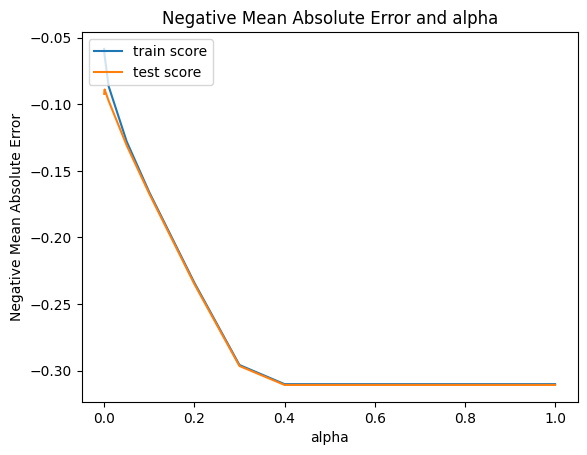

In [379]:
# Converting the 'param_alpha' column in the cv_results dataframe to float32 data type
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting the mean_train_score and mean_test_score against the param_alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')  
plt.ylabel('Negative Mean Absolute Error') 
plt.title("Negative Mean Absolute Error and alpha")  
plt.legend(['train score', 'test score'], loc='upper left')  # Adding legend to the plot
plt.show() 

#### From the graph we observe that the negative absolute mean error is the lowest at 0.4 and stabilizes thereafter. Since we see that the alpha values for the traina and test score concide pretty much after 0.01, we will select this to be our alpha value.

In [408]:
# Setting the value of alpha for Lasso regression
alpha = 0.01
# Creating a Lasso regression model with the specified alpha value
lasso = Lasso(alpha=alpha)
# Fitting the Lasso model to the training data
lasso.fit(X_train, y_train)
# Retrieving the coefficients of the features
lasso.coef_

array([-1.00072531e-02,  9.13880355e-03,  1.15768497e-01,  2.39420525e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.32436285e-02,  1.03238994e-03,  0.00000000e+00, -0.00000000e+00,
        1.19683443e-01,  2.08829381e-02,  0.00000000e+00,  2.35462645e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.09970100e-02,
        8.68536759e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49989811e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.37127203e-02, -1.23137964e-02,  0.00000000e+00,
        0.00000000e+00, -2.32606508e-03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  7.18534196e-03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        4.11190278e-03,  0.00000000e+00,  1.10006431e-02, -1.12983581e-02,
        0.00000000e+00, -

In [405]:
# Extracting model parameters and rounding them to 3 decimal places
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
# Creating a list of column names and their corresponding model parameters
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('MSSubClass', -0.012),
 ('LotArea', 0.019),
 ('OverallQual', 0.072),
 ('OverallCond', 0.039),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.011),
 ('BsmtFinSF2', 0.001),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.043),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.003),
 ('GrLivArea', 0.139),
 ('BsmtFullBath', 0.018),
 ('BsmtHalfBath', 0.0),
 ('HalfBath', 0.007),
 ('BedroomAbvGr', 0.009),
 ('KitchenAbvGr', -0.011),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.006),
 ('PoolArea', -0.004),
 ('MiscVal', 0.0),
 ('MSZoning_FV', 0.036),
 ('MSZoning_RH', 0.021),
 ('MSZoning_RL', 0.074),
 ('MSZoning_RM', 0.048),
 ('Street_Pave', 0.002),
 ('LotShape_IR2', 0.003),
 ('LotShape_IR3', -0.001),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.004),
 ('Utilities_NoSeWa', -0.003),
 ('LotConfig_CulDSac'

In [407]:
# Creating a Lasso regression model with a regularization strength of 0.01
lm = Lasso(alpha=0.01)

# Training the model using the training data
lm.fit(X_train, y_train)

# Making predictions on the training data and calculate the R-squared score
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# Making predictions on the test data and calculate the R-squared score
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8910906020644371
0.872093581321833


In [393]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14507148939052789


In [394]:
# Zip the 'cols' and 'model_parameters' lists into a list of tuples
tuplasso = list(zip(cols, model_parameters))

In [395]:
# Creating a DataFrame from the tuple 'tuplasso'
parameters = pd.DataFrame(tuplasso)

# Renaming the columns of the DataFrame as 'Variable' and 'Coefficient'
parameters.columns = ['Variable', 'Coefficient']

parameters.head()

Variable  Coefficient
0     constant       12.022
1   MSSubClass       -0.000
2      LotArea        0.000
3  OverallQual        0.022
4  OverallCond       -0.000

In [396]:
# Sorting the coefficients in ascending order
parameters = parameters.sort_values((['Coefficient']), axis = 0, ascending = False)
parameters

Variable  Coefficient
0                 constant       12.022
3              OverallQual        0.022
164       BsmtFinType1_BLQ       -0.000
152            BsmtQual_Fa       -0.000
153            BsmtQual_Gd        0.000
..                     ...          ...
84         Condition2_RRNn       -0.000
85         BldgType_2fmCon       -0.000
86         BldgType_Duplex       -0.000
87          BldgType_Twnhs       -0.000
237  SaleCondition_Partial        0.000

[238 rows x 2 columns]

In [397]:
# Selecting variables whose coefficients are non-zero
predictions = pd.DataFrame(parameters[(parameters['Coefficient'] != 0)])
predictions

Variable  Coefficient
0     constant       12.022
3  OverallQual        0.022

In [389]:
predictions.shape

(60, 2)

## Ridge Regression

The second regularisation model we will employ is the Ridge Regression. Here the alpha parameter serves as a regularization factor for the model. When alpha is set to zero, ridge regression essentially becomes a linear regression.  Sixteen distinct alpha values spanning from 7e-4 to 20 were considered, utilizing a 10-fold cross-validation process. 

In [365]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [366]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.434063      0.076466         0.031861        0.008958      0.0001   
1       0.469408      0.014859         0.026951        0.014477       0.001   
2       0.465395      0.028422         0.028512        0.011561        0.01   
3       0.439860      0.035211         0.031449        0.013683        0.05   
4       0.415859      0.047972         0.040409        0.019609         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.094112          -0.097821          -0.095053   
1   {'alpha': 0.001}          -0.094111          -0.097820          -0.095053   
2    {'alpha': 0.01}          -0.094100          -0.097815          -0.095051   
3    {'alpha': 0.05}          -0.094058          -0.097793          -0.095042   
4     {'alpha': 0.1}          -0.094009          -0.097766          -0.095034   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.098402  ...        -0.094226        0.004540               23   
1          -0.098398  ...        -0.094224        0.004539               22   
2          -0.098359  ...        -0.094212        0.004534               21   
3          -0.098187  ...        -0.094157        0.004511               20   
4          -0.097979  ...        -0.094091        0.004483               19   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.056379           -0.057465           -0.058838   
1           -0.056379           -0.057465           -0.058838   
2           -0.056381           -0.057467           -0.058839   
3           -0.056389           -0.057474           -0.058846   
4           -0.056399           -0.057482           -0.058856   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.059706           -0.057908         -0.058059         0.001142  
1           -0.059706           -0.057908         -0.058059         0.001142  
2           -0.059710           -0.057910         -0.058061         0.001142  
3           -0.059725           -0.057921         -0.058071         0.001144  
4           -0.059744           -0.057936         -0.058083         0.001147  

[5 rows x 21 columns]

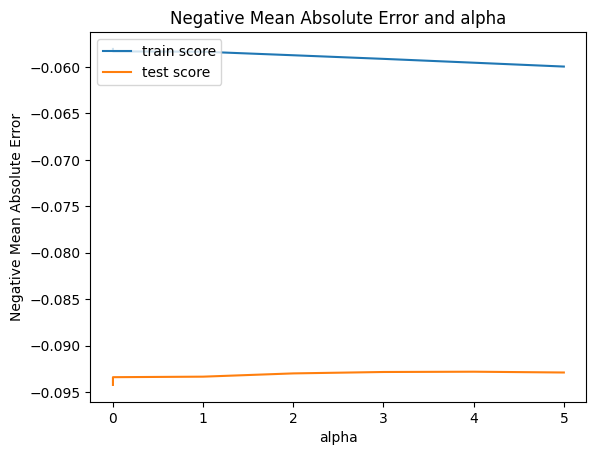

In [367]:
# Convert the 'param_alpha' column to integer type
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plot the mean train score and mean test score against alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [368]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [373]:
# Setting the value of alpha to 4.0
alpha = 4.0

# Creating a Ridge regression model with the specified alpha value
ridge = Ridge(alpha=alpha)

# Fit the Ridge model to the training data
ridge.fit(X_train, y_train)

# Retrieving the coefficients of the fitted Ridge model
ridge.coef_

array([-1.57758812e-02,  2.74899272e-02,  6.32201687e-02,  3.77262706e-02,
        8.39630708e-04,  2.54280180e-02,  7.62748816e-03,  9.98903266e-03,
        3.83486008e-02,  4.49868817e-02,  5.10560945e-02,  9.68212988e-04,
        7.55173856e-02,  1.39954592e-02,  1.15220393e-03,  7.53694496e-03,
        1.40142699e-02, -1.53380260e-02, -5.29103517e-03,  3.28364962e-02,
        1.06182596e-02,  3.09221029e-03,  1.72183656e-03,  5.75537975e-03,
        7.79248972e-03, -9.47975938e-04,  1.75185933e-03,  6.83001609e-02,
        3.83345494e-02,  1.32765663e-01,  1.03681246e-01,  3.79231939e-03,
        4.06963180e-03, -1.90729232e-03,  2.46670476e-03,  3.41828184e-03,
        1.05873530e-03,  1.05862172e-02, -5.20937621e-03,  7.60990093e-03,
       -7.48831375e-03, -1.63464537e-03, -3.85848545e-03,  5.19009230e-03,
       -1.78233684e-02,  3.61109646e-04, -8.09333450e-03,  1.51628255e-03,
        9.22250724e-03,  3.07677016e-03,  2.16424320e-02, -1.89559790e-02,
        6.43625153e-03, -

In [374]:
# Listing the ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.022),
 ('MSSubClass', -0.016),
 ('LotArea', 0.027),
 ('OverallQual', 0.063),
 ('OverallCond', 0.038),
 ('MasVnrArea', 0.001),
 ('BsmtFinSF1', 0.025),
 ('BsmtFinSF2', 0.008),
 ('BsmtUnfSF', 0.01),
 ('TotalBsmtSF', 0.038),
 ('1stFlrSF', 0.045),
 ('2ndFlrSF', 0.051),
 ('LowQualFinSF', 0.001),
 ('GrLivArea', 0.076),
 ('BsmtFullBath', 0.014),
 ('BsmtHalfBath', 0.001),
 ('HalfBath', 0.008),
 ('BedroomAbvGr', 0.014),
 ('KitchenAbvGr', -0.015),
 ('Fireplaces', -0.005),
 ('GarageArea', 0.033),
 ('WoodDeckSF', 0.011),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', 0.002),
 ('3SsnPorch', 0.006),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.001),
 ('MiscVal', 0.002),
 ('MSZoning_FV', 0.068),
 ('MSZoning_RH', 0.038),
 ('MSZoning_RL', 0.133),
 ('MSZoning_RM', 0.104),
 ('Street_Pave', 0.004),
 ('LotShape_IR2', 0.004),
 ('LotShape_IR3', -0.002),
 ('LotShape_Reg', 0.002),
 ('LandContour_HLS', 0.003),
 ('LandContour_Low', 0.001),
 ('LandContour_Lvl', 0.011),
 ('Utilities_NoSeWa', -0.005),
 ('

In [375]:
# ridge regression
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9310507105086625
0.8817096422863805


In [376]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.13951168138309764
